In [199]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [198]:
# Loading Dataset

data = pd.read_csv('Loan_Status.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
# Checking the shape of the dataset

data.shape

(614, 13)

In [45]:
# Dropping the duplicates

data.drop_duplicates(inplace = True)

In [46]:
# Checking for null values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

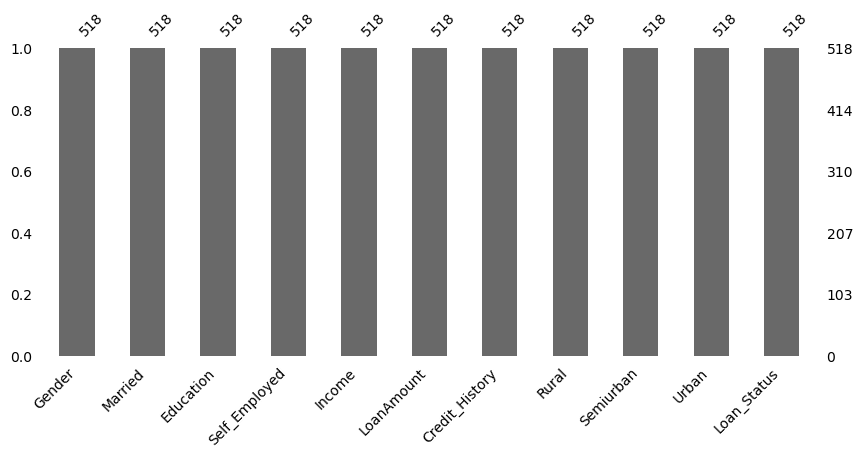

In [196]:
msno.bar(data, fontsize = 10, figsize=(10,4))
plt.show()

### Since , there are many null values in the dataset . We are going to fill those null values

In [48]:
data.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [49]:
# Filling the null values in the Gender column with mode values

mode = data.Gender.mode()[0]
print('Mode value of the Gender column : ', mode)
data.Gender.fillna(mode, inplace = True)

Mode value of the Gender column :  Male


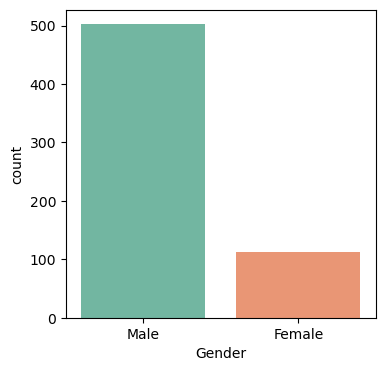

In [50]:
plt.figure(figsize = (4,4))
sns.countplot(data = data, x = 'Gender', palette = 'Set2')
plt.show()

In [51]:
data.Married.value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

In [52]:
# Filling the null values in the Married column with mode values

mode = data.Married.mode()[0]
print('Mode value of the Married column : ', mode)
data.Married.fillna(mode, inplace = True)

Mode value of the Married column :  Yes


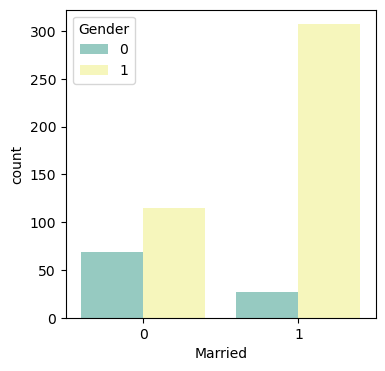

In [187]:
plt.figure(figsize = (4,4))
sns.countplot(data = data, x = 'Married',hue = 'Gender', palette = 'Set3')
plt.show()

In [54]:
data.Self_Employed.value_counts(dropna = False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

In [55]:
# Filling the null values in the Self_Employed column with mode values

mode = data.Self_Employed.mode()[0]
print('Mode value of the Self_Employed column : ', mode)
data.Self_Employed.fillna(mode, inplace = True)

Mode value of the Self_Employed column :  No


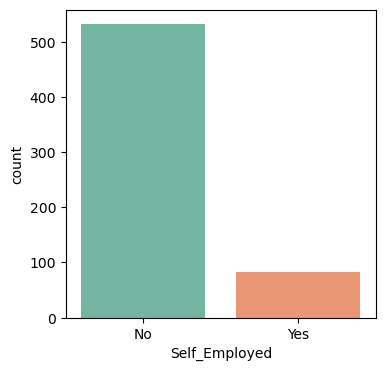

In [56]:
plt.figure(figsize = (4,4))
sns.countplot(data = data, x = 'Self_Employed', palette = 'Set2')
plt.show()

In [57]:
# Creating a new column Income

data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(columns = {'ApplicantIncome', 'CoapplicantIncome'}, inplace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


#### Since there are many outliers in the Loan Amount and Income column we firts remove the outliers nd then fill the null values

<Axes: xlabel='LoanAmount', ylabel='Count'>

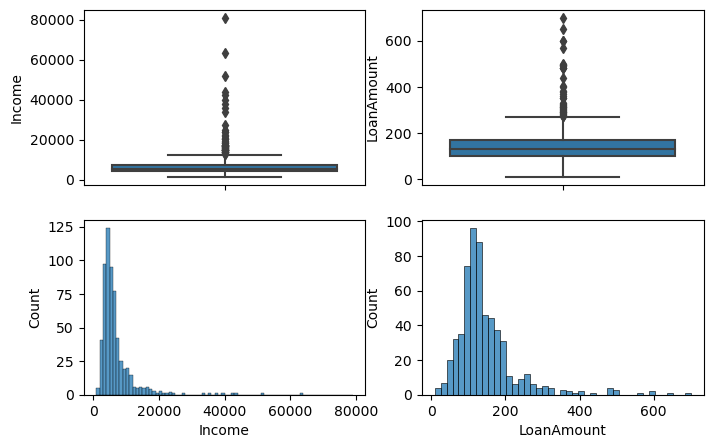

In [58]:
# Before removing Outliers

fig, axes = plt.subplots(2,2,figsize=(8,5))
sns.boxplot(ax=axes[0,0], data = data, y = 'Income')
sns.boxplot(ax=axes[0,1], data = data, y = 'LoanAmount')
sns.histplot(ax=axes[1,0], x = data['Income'], bins = np.arange(1000, 80000, 1000))
sns.histplot(ax=axes[1,1], x = data['LoanAmount'])

In [59]:
# Using IQR method to remove the Outliers

columns = ['Income', 'LoanAmount']
for i in columns:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1

  ll = q1 - 1.5*iqr
  ul = q3 + 1.5*iqr
  data = data.loc[(data[i]>=ll)&(data[i]<=ul)]

In [60]:
data.shape

(518, 12)

<Axes: xlabel='LoanAmount', ylabel='Count'>

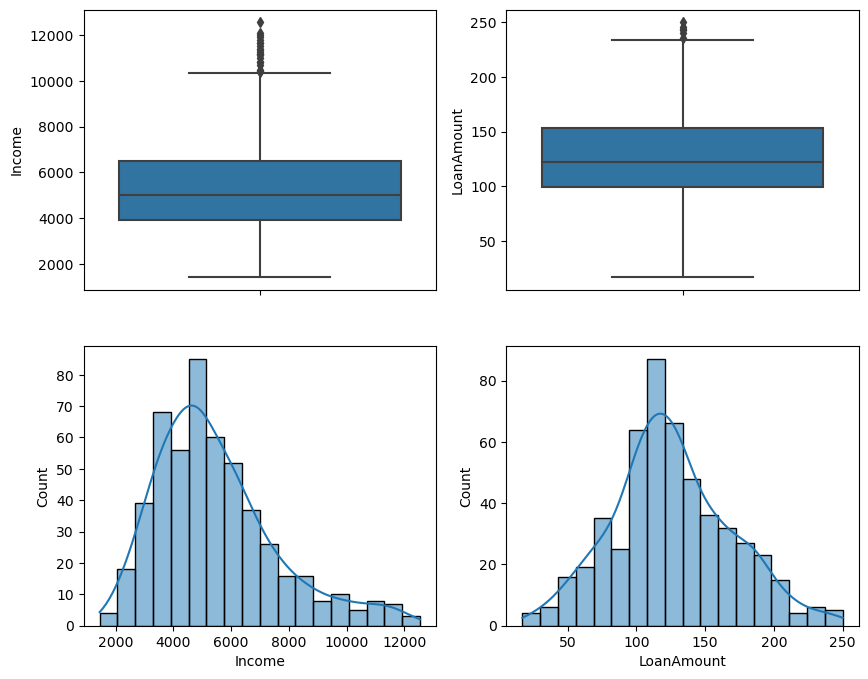

In [61]:
# After removing outliers

fig, axes = plt.subplots(2,2,figsize=(10,8))
sns.boxplot(ax=axes[0,0], data = data, y = 'Income')
sns.boxplot(ax=axes[0,1], data = data, y = 'LoanAmount')
sns.histplot(ax=axes[1,0], x = data['Income'], kde = True)
sns.histplot(ax=axes[1,1], x = data['LoanAmount'], kde = True)

### We have removed almost all the outliers

In [62]:
data.Loan_Amount_Term.value_counts(dropna = False)

Loan_Amount_Term
360.0    429
180.0     36
NaN       14
480.0     14
300.0     10
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [63]:
# Filling the null values in the Loan_Amount_Term column with mode values

mode = data.Loan_Amount_Term.mode()[0]
print('Mode value of the Loan_Amount_Term column : ', mode)
data.Loan_Amount_Term.fillna(mode, inplace = True)

Mode value of the Loan_Amount_Term column :  360.0


In [64]:
data.Credit_History.value_counts(dropna = False)

Credit_History
1.0    402
0.0     75
NaN     41
Name: count, dtype: int64

In [65]:
# Filling the null values in the Credit_History column with mode values

mode = data.Credit_History.mode()[0]
print('Mode value of the Credit_History column : ', mode)
data.Credit_History.fillna(mode, inplace = True)
data.Credit_History = data.Credit_History.astype(int)

Mode value of the Credit_History column :  1.0


In [66]:
data.Property_Area.value_counts(dropna = False)

Property_Area
Semiurban    201
Urban        163
Rural        154
Name: count, dtype: int64

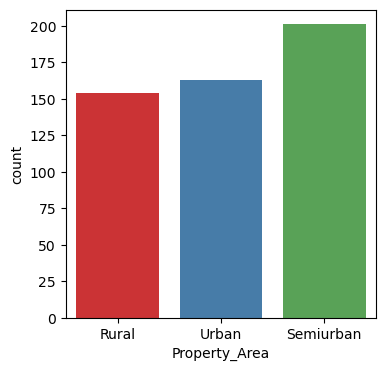

In [67]:
plt.figure(figsize = (4,4))
sns.countplot(data = data, x = 'Property_Area', palette = 'Set1')
plt.show()

In [68]:
# Dropping unwanted columns

data = data.drop(columns = {'Loan_ID', 'Loan_Amount_Term', 'Dependents'})
data.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,Graduate,No,128.0,1,Rural,N,6091.0
2,Male,Yes,Graduate,Yes,66.0,1,Urban,Y,3000.0
3,Male,Yes,Not Graduate,No,120.0,1,Urban,Y,4941.0
4,Male,No,Graduate,No,141.0,1,Urban,Y,6000.0
6,Male,Yes,Not Graduate,No,95.0,1,Urban,Y,3849.0


# Label Encoding

Gender : 0 --> Female , 1 --> Male

Married : 0 --> No , 1 --> Yes

Education : 0 --> Graduate , 1 --> Not Graduate

Self_Employed : 0 --> No , 1 --> Yes

Loan_Status : 0 --> No , 1 --> Yes

In [69]:
encode = LabelEncoder()
data['Gender'] = encode.fit_transform(data['Gender'])
data['Married'] = encode.fit_transform(data['Married'])
data['Education'] = encode.fit_transform(data['Education'])
data['Self_Employed'] = encode.fit_transform(data['Self_Employed'])
data['Loan_Status'] = encode.fit_transform(data['Loan_Status'])
data.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Income
1,1,1,0,0,128.0,1,Rural,0,6091.0
2,1,1,0,1,66.0,1,Urban,1,3000.0
3,1,1,1,0,120.0,1,Urban,1,4941.0
4,1,0,0,0,141.0,1,Urban,1,6000.0
6,1,1,1,0,95.0,1,Urban,1,3849.0


In [70]:
# creating dummies for the Property_area column

Area_dummys = pd.get_dummies(data['Property_Area']).astype(int)

for i in range(len(Area_dummys.columns)):
  data.insert(loc = data.columns.get_loc('Property_Area')+i+1, column = Area_dummys.columns[i], value = Area_dummys.iloc[:, i] )

data.drop(columns = {'Property_Area'}, inplace = True)
data.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Rural,Semiurban,Urban,Loan_Status,Income
1,1,1,0,0,128.0,1,1,0,0,0,6091.0
2,1,1,0,1,66.0,1,0,0,1,1,3000.0
3,1,1,1,0,120.0,1,0,0,1,1,4941.0
4,1,0,0,0,141.0,1,0,0,1,1,6000.0
6,1,1,1,0,95.0,1,0,0,1,1,3849.0


In [71]:
# Chaging the order of columns

data = data.loc[:,'Gender	Married	Education	Self_Employed	Income LoanAmount	Credit_History	Rural	Semiurban	Urban	Loan_Status'.split()]
data.head()

,Gender,Married,Education,Self_Employed,Income,LoanAmount,Credit_History,Rural,Semiurban,Urban,Loan_Status
1,1,1,0,0,6091.0,128.0,1,1,0,0,0
2,1,1,0,1,3000.0,66.0,1,0,0,1,1
3,1,1,1,0,4941.0,120.0,1,0,0,1,1
4,1,0,0,0,6000.0,141.0,1,0,0,1,1
6,1,1,1,0,3849.0,95.0,1,0,0,1,1


In [72]:
# Splitting the Feature and Target

X = data.drop(columns = {'Loan_Status'}, axis = 1).values
Y = data.Loan_Status

print(X.shape, Y.shape)

(518, 10) (518,)


In [164]:
# Splitting the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X.shape, X_train.shape, X_test.shape)

(518, 10) (362, 10) (156, 10)


In [165]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[:, 4:6])
X_train[:, 4:6] = scaler.transform(X_train[:, 4:6])
X_test[:, 4:6] = scaler.transform(X_test[:, 4:6])

# 1. Logistic Regression

In [166]:
# Traning data

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
train_pre = lr.predict(X_train)
acc = accuracy_score(Y_train, train_pre)
print("Accuracy score of Training set : ", round(np.mean(acc)*100, 2))

Accuracy score of Training set :  83.15


Precision Score of Training set :  0.8125
Recall Score of Training set :  0.9840637450199203
F1 Score of Training set :  0.8900900900900901


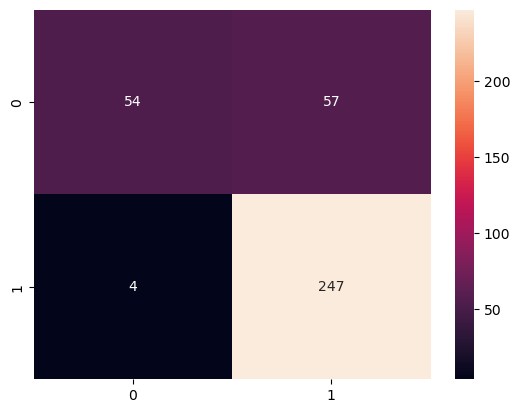

In [167]:
# Traning data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
con = confusion_matrix(Y_train, train_pre)
sns.heatmap(con, annot= True, fmt='d')
print("Precision Score of Training set : ", precision_score(Y_train, train_pre))
print("Recall Score of Training set : ", recall_score(Y_train, train_pre))
print("F1 Score of Training set : ", f1_score(Y_train, train_pre))

In [168]:
# Testing data

test_pre = lr.predict(X_test)
acc = accuracy_score(Y_test, test_pre)
print("Accuracy score of Testing set : ", round(np.mean(acc)*100, 2))

Accuracy score of Testing set :  80.13


Precision Score of Testing set :  0.7971014492753623
Recall Score of Testing set :  0.9734513274336283
F1 Score of Testing set :  0.8764940239043825


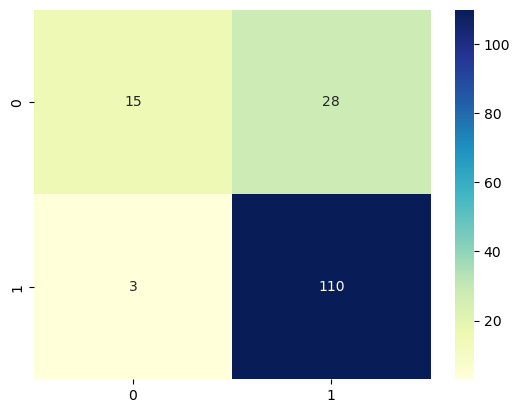

In [169]:
# Testing data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_test, test_pre)
sns.heatmap(con, annot= True, fmt='d', cmap="YlGnBu")
print("Precision Score of Testing set : ", precision_score(Y_test, test_pre))
print("Recall Score of Testing set : ", recall_score(Y_test, test_pre))
print("F1 Score of Testing set : ", f1_score(Y_test, test_pre))

# 2. SVM

In [183]:
# Training data

from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
svm_train_pre = svm.predict(X_train)
acc = accuracy_score(Y_train, svm_train_pre)
print("Accuracy score of Training set : ", round(np.mean(acc)*100, 2))

Accuracy score of Training set :  83.43


Precision Score of Training set :  0.8131147540983606
Recall Score of Training set :  0.9880478087649402
F1 Score of Training set :  0.8920863309352518


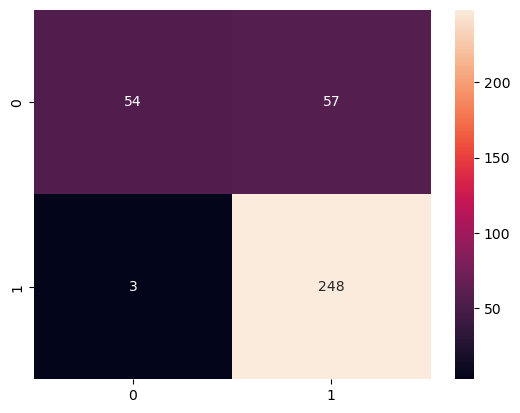

In [184]:
# Tranining data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
con = confusion_matrix(Y_train, svm_train_pre)
sns.heatmap(con, annot= True, fmt='d')
print("Precision Score of Training set : ", precision_score(Y_train, svm_train_pre))
print("Recall Score of Training set : ", recall_score(Y_train, svm_train_pre))
print("F1 Score of Training set : ", f1_score(Y_train, svm_train_pre))

In [185]:
# Testing data

test_pre = svm.predict(X_test)
acc = accuracy_score(Y_test, test_pre)
print("Accuracy score of Testing set : ", round(np.mean(acc)*100, 2))

Accuracy score of Testing set :  80.13


Precision Score of Testing set :  0.7971014492753623
Recall Score of Testing set :  0.9734513274336283
F1 Score of Testing set :  0.8764940239043825


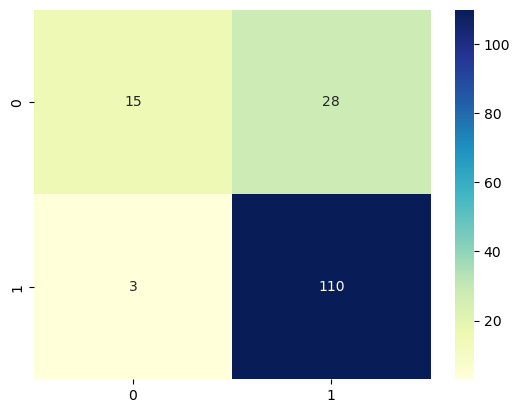

In [186]:
# Testing data accuracy

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
con = confusion_matrix(Y_test, test_pre)
sns.heatmap(con, annot= True, fmt='d', cmap="YlGnBu")
print("Precision Score of Testing set : ", precision_score(Y_test, test_pre))
print("Recall Score of Testing set : ", recall_score(Y_test, test_pre))
print("F1 Score of Testing set : ", f1_score(Y_test, test_pre))